In [2]:
import numpy as np
import pandas as pd

In [3]:
data= pd.read_csv("Final data_without_transactions.csv")

In [4]:
data.head()

,Unnamed: 0,loan_id,account_id,loan_date,loan_amount,duration,payments,status,district_id_bank,frequency_statements,...,no. of municipalities with inhabitants 2000-9999_y,no. of municipalities with inhabitants >10000_y,no. of cities_y,ratio of urban inhabitants_y,average salary_y,unemployment rate 95_y,unemployment rate 96_y,no. of entrepreneurs per 1000 inhabitants_y,no. of committed crimes 95_y,no. of committed crimes 96_y
0,0,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,1,5316,1801,930711,165960,36,4610.0,A,46,POPLATEK MESICNE,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,2,6863,9188,930728,127080,60,2118.0,A,45,POPLATEK MESICNE,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,3,5325,1843,930803,105804,36,2939.0,A,12,POPLATEK MESICNE,...,10,1,9,74.8,10045,1.42,1.71,135,6604,6295
4,4,7240,11013,930906,274740,60,4579.0,A,1,POPLATEK TYDNE,...,5,1,5,50.5,8288,3.79,4.52,110,1562,1460


In [25]:
trans=pd.read_csv("trans_mod.csv")

In [26]:
trans.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month
0,2378,credit,credit in cash,700.0,700.0,NaN,NaN,NaN,01-01-1993,Jan-93
1,576,credit,credit in cash,900.0,900.0,NaN,NaN,NaN,01-01-1993,Jan-93
2,704,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN,01-01-1993,Jan-93
3,3818,credit,credit in cash,600.0,600.0,NaN,NaN,NaN,01-01-1993,Jan-93
4,1972,credit,credit in cash,400.0,400.0,NaN,NaN,NaN,02-01-1993,Jan-93


In [27]:
trans.shape

(1048575, 10)

In [28]:
#TRANS EDIT (AGE, remove unwanted columns)

In [29]:
trans.drop(['account_partner','to_bank'],axis=1,inplace=True)

In [30]:
trans.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,Date,month
0,2378,credit,credit in cash,700.0,700.0,NaN,01-01-1993,Jan-93
1,576,credit,credit in cash,900.0,900.0,NaN,01-01-1993,Jan-93
2,704,credit,credit in cash,1000.0,1000.0,NaN,01-01-1993,Jan-93
3,3818,credit,credit in cash,600.0,600.0,NaN,01-01-1993,Jan-93
4,1972,credit,credit in cash,400.0,400.0,NaN,02-01-1993,Jan-93


In [31]:
trans['trans_date'] =  pd.to_datetime( trans['Date'], format='%d-%m-%Y' )
trans['today'] = pd.to_datetime('01-01-1999')
trans['trans_age']= (trans['today'] - trans['trans_date']).dt.days

In [32]:
trans.drop(['trans_date','Date','today','month'],axis=1,inplace=True)

In [33]:
trans.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,trans_age
0,2378,credit,credit in cash,700.0,700.0,NaN,2191
1,576,credit,credit in cash,900.0,900.0,NaN,2191
2,704,credit,credit in cash,1000.0,1000.0,NaN,2191
3,3818,credit,credit in cash,600.0,600.0,NaN,2191
4,1972,credit,credit in cash,400.0,400.0,NaN,2190


In [34]:
#DATA EDIT (AGE, remove unwanted columns)

In [99]:
data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Year', 'Date', 'Month', 'Gender',
       'district name_x', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'district name_y', 'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',


In [100]:
data['account_creation'].head()

0    930322
1    930213
2    930208
3    930130
4    930214
Name: account_creation, dtype: int64

In [101]:
data['add']='19'
data['account_creation']= data['add']+ data['account_creation'].map(str)
data['account_creation'] =  pd.to_datetime(data['account_creation'], format='%Y%m%d')
data['today'] = pd.Timestamp('19990101')
data['Account_age_days']= (data['today'] - data['account_creation']).dt.days

In [102]:
data['Account_age_days'].head()

0    2111
1    2148
2    2153
3    2162
4    2147
Name: Account_age_days, dtype: int64

In [103]:
data['loan_date'].head()

0    930705
1    930711
2    930728
3    930803
4    930906
Name: loan_date, dtype: int64

In [104]:
#data['add']='19'
data['loan_date']= data['add']+ data['loan_date'].map(str)
data['loan_date'] =  pd.to_datetime(data['loan_date'], format='%Y%m%d')
#data['today'] = pd.Timestamp('19990101')
data['loan_age_days']= (data['today'] - data['loan_date']).dt.days

In [105]:
data['loan_age_days'].head()

0    2006
1    2000
2    1983
3    1977
4    1943
Name: loan_age_days, dtype: int64

In [106]:
data['card_issued'].head()

0                NaN
1                NaN
2                NaN
3    980911 00:00:00
4    950502 00:00:00
Name: card_issued, dtype: object

In [107]:
data['card_issued']=data['card_issued'].str[:6]
data['card_issued']=data['card_issued'].fillna('990101')
print(data['card_issued'].head())
#data['card_issued_1'] =  pd.to_datetime(data['card_issued'], format='%f')

0    990101
1    990101
2    990101
3    980911
4    950502
Name: card_issued, dtype: object


In [108]:
data['card_issued']= data['add']+ data['card_issued'].map(str)
data['card_issued'] =  pd.to_datetime(data['card_issued'], format='%Y%m%d')
#data['today'] = pd.Timestamp('19990101')
data['card_issued_days']= (data['today'] - data['card_issued']).dt.days

In [109]:
data['card_issued_days'].head()

0       0
1       0
2       0
3     112
4    1340
Name: card_issued_days, dtype: int64

In [116]:
data['Year']= data['add']+ data['Year'].map(str)
data['Client_bday'] = data['Year'].map(str)+data['Month'].map(str)+data['Date'].map(str)
data['Client_bday'] =  pd.to_datetime(data['Client_bday'], format='%Y%m%d')
data['Client_age']= (data['today'] - data['Client_bday']).dt.days
data['Client_age']= (data['Client_age']/365).map(int)  
data['Client_age'].head()

In [117]:
data['Client_age'].head()

0    51
1    30
2    62
3    58
4    20
Name: Client_age, dtype: int64

In [118]:
data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Year', 'Date', 'Month', 'Gender',
       'district name_x', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'district name_y', 'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',


In [120]:
data.drop(['loan_id','loan_date','district_id_bank','account_creation','disp_id', 'client_id',
          'card_id','card_issued','district_id_client','Year', 'Date', 'Month','district name_x', 'region_x',
          'district name_y', 'region_y','add','today'],axis=1,inplace=True)

In [121]:
data.columns

Index(['Unnamed: 0', 'account_id', 'loan_amount', 'duration', 'payments',
       'status', 'frequency_statements', 'disp_type', 'card_type', 'Gender',
       'no. of inhabitants_x', 'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
       'ratio of urban inhabitants_y', 'average salary_y',
 

In [132]:
OBJ1_merged_data=pd.merge(trans, data, on='account_id', how='left')

In [133]:
OBJ1_merged_data.columns

Index(['account_id', 'type', 'mode of transaction', 'amount', 'balance',
       'transaction_character', 'trans_age', 'Unnamed: 0', 'loan_amount',
       'duration', 'payments', 'status', 'frequency_statements', 'disp_type',
       'card_type', 'Gender', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities wit

In [135]:
OBJ1_merged_data.shape
OBJ1_merged_data.to_csv("OBJ1_merged_data.csv")

In [139]:
OBJ1_merged_data=pd.read_csv("OBJ1_merged_data.csv")

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (25,28,38,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
OBJ1_merged_data.head()

,Unnamed: 0,account_id,type,mode of transaction,amount,balance,transaction_character,trans_age,Unnamed: 0.1,loan_amount,...,unemployment rate 95_y,unemployment rate 96_y,no. of entrepreneurs per 1000 inhabitants_y,no. of committed crimes 95_y,no. of committed crimes 96_y,Account_age_days,loan_age_days,card_issued_days,Client_bday,Client_age
0,0,2378,credit,credit in cash,700.0,700.0,NaN,2191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,576,credit,credit in cash,900.0,900.0,NaN,2191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,704,credit,credit in cash,1000.0,1000.0,NaN,2191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3818,credit,credit in cash,600.0,600.0,NaN,2191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1972,credit,credit in cash,400.0,400.0,NaN,2190,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
OBJ1_merged_data.columns

Index(['Unnamed: 0', 'account_id', 'type', 'mode of transaction', 'amount',
       'balance', 'transaction_character', 'trans_age', 'Unnamed: 0.1',
       'loan_amount', 'duration', 'payments', 'status', 'frequency_statements',
       'disp_type', 'card_type', 'Gender', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of mu

In [144]:
OBJ1_merged_data['loan_amount'].fillna(0, inplace=True)
OBJ1_merged_data['duration'].fillna(0)
OBJ1_merged_data['payments'].fillna(0)
OBJ1_merged_data['no. of inhabitants_x'].fillna(0)
OBJ1_merged_data['no_of_municipalities_inhabitants < 499_x'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants 500-1999_x'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants 2000-9999_x'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants >10000_x'].fillna(0)
OBJ1_merged_data['no. of cities_x'].fillna(0)
OBJ1_merged_data['ratio of urban inhabitants_x'].fillna(0)
OBJ1_merged_data['average salary_x'].fillna(0)
OBJ1_merged_data['unemployment rate 95_x'].fillna(0)
OBJ1_merged_data['unemployment rate 96_x'].fillna(0)
OBJ1_merged_data['no. of entrepreneurs per 1000 inhabitants_x'].fillna(0)
OBJ1_merged_data['no. of committed crimes 95_x'].fillna(0)
OBJ1_merged_data['no. of committed crimes 96_x'].fillna(0)
OBJ1_merged_data['no. of inhabitants_y'].fillna(0)
OBJ1_merged_data['no_of_municipalities_inhabitants < 499_y'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants 500-1999_y'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants 2000-9999_y'].fillna(0)
OBJ1_merged_data['no. of municipalities with inhabitants >10000_y'].fillna(0)
OBJ1_merged_data['no. of cities_y'].fillna(0)
OBJ1_merged_data['average salary_y'].fillna(0)
OBJ1_merged_data['ratio of urban inhabitants_y'].fillna(0)
OBJ1_merged_data['unemployment rate 95_y'].fillna(0)
OBJ1_merged_data['unemployment rate 96_y'].fillna(0)
OBJ1_merged_data['no. of entrepreneurs per 1000 inhabitants_y'].fillna(0)
OBJ1_merged_data['no. of committed crimes 95_y'].fillna(0)
OBJ1_merged_data['no. of committed crimes 96_y'].fillna(0)     

In [145]:
OBJ1_merged_data['status'].unique()


array([nan, 'A', 'B', 'D', 'C'], dtype=object)

In [147]:
#Deleting ones with no loan status
OBJ1_merged_data_1= OBJ1_merged_data.dropna(subset=['status']) 

In [150]:
OBJ1_merged_data_1.shape

(231874, 48)

In [151]:
OBJ1_merged_data_1.drop('account_id', axis=1, inplace=True)

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
OBJ1_merged_data_1[['Account_age_days', 'loan_age_days', 'card_issued_days', 'Client_bday','Client_age']].isnull().values.any()

False

In [154]:
OBJ1_merged_data_1[['no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
       'ratio of urban inhabitants_y', 'average salary_y',
       'unemployment rate 95_y', 'unemployment rate 96_y',
       'no. of entrepreneurs per 1000 inhabitants_y',
       'no. of committed crimes 95_y', 'no. of committed crimes 96_y']].isnull().values.any()

False

In [155]:
OBJ1_merged_data_1[['amount',
       'balance', 'trans_age',
       'loan_amount', 'duration', 'payments']].isnull().values.any()

False

In [156]:
OBJ1_merged_data_1.to_csv("OBJ1_merged_data_1.csv")

In [158]:
#Deleted unnamed columns in between 
OBJ1_merged_data_1=pd.read_csv("OBJ1_merged_data_1.csv")

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,25,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
OBJ1_merged_data_dummied= pd.get_dummies(data=OBJ1_merged_data_1, columns=['frequency_statements', 'card_type', 'Gender', 'disp_type', 'type', 'mode of transaction', 'transaction_character'])

In [160]:
OBJ1_merged_data_dummied.isnull().values.any()

False

In [161]:
OBJ1_merged_data_dummied.to_csv("OBJ1_merged_data_dummied.csv")

In [ ]:
# #these should be one hot encoded
# 'frequency_statements', 'card_type', 'Gender', 'disp_type', 'type', 'mode of transaction', 'transaction_character'
# 'frequency_statements'

# #these to be deleted
# #unnamed_0, account_id







#check if they have nan (CHECKED, NO NULLS)
#'Account_age_days', 'loan_age_days', 'card_issued_days', 'Client_bday','Client_age'

#'no. of inhabitants_x',
#        'no_of_municipalities_inhabitants < 499_x',
#        'no. of municipalities with inhabitants 500-1999_x',
#        'no. of municipalities with inhabitants 2000-9999_x',
#        'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
#        'ratio of urban inhabitants_x', 'average salary_x',
#        'unemployment rate 95_x', 'unemployment rate 96_x',
#        'no. of entrepreneurs per 1000 inhabitants_x',
#        'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
#        'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
#        'no. of municipalities with inhabitants 500-1999_y',
#        'no. of municipalities with inhabitants 2000-9999_y',
#        'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
#        'ratio of urban inhabitants_y', 'average salary_y',
#        'unemployment rate 95_y', 'unemployment rate 96_y',
#        'no. of entrepreneurs per 1000 inhabitants_y',
#        'no. of committed crimes 95_y', 'no. of committed crimes 96_y'

#        'amount',
#        'balance', 'trans_age',
#        'loan_amount', 'duration', 'payments', 

In [7]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support) 
import numpy as np

In [168]:
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']=='A', 'status') ] =0
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']=='B', 'status') ] =1
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']=='C', 'status') ] =2
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']=='D', 'status') ] =3

In [169]:
OBJ1_merged_data_dummied['status']= OBJ1_merged_data_dummied['status'].astype('category')

In [172]:
OBJ1_merged_data_dummied.drop('Client_bday', axis=1, inplace=True)

In [174]:
OBJ1_merged_data_dummied.to_csv("OBJ1_merged_data_dummied.csv")

In [2]:
import pandas as pd
#After Deleting ? in unemployment rate '95 
OBJ1_merged_data_dummied= pd.read_csv("OBJ1_merged_data_dummied.csv")

In [3]:
#simplifying to binary
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']==0, 'status') ] =0
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']==1, 'status') ] =1
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']==2, 'status') ] =0
OBJ1_merged_data_dummied.loc[ (OBJ1_merged_data_dummied['status']==3, 'status') ] =1

In [8]:
#random forests classifier

X = OBJ1_merged_data_dummied.loc[:, OBJ1_merged_data_dummied.columns != 'status']
y = OBJ1_merged_data_dummied.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

random_state = np.random.RandomState(0)
clf= RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.999913054819


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0
area under curve (auc):  1.0
Confusion matrix [[41579     0]
 [    0  4427]]


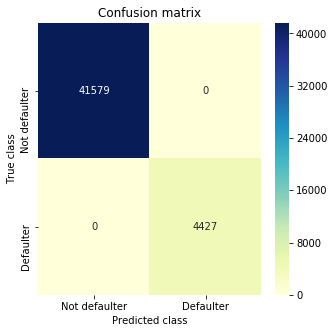

In [15]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
#plt.savefig("C:/Users/ann.maryvarghese/Desktop/ann_results/final/minmax_sig_ConfusionMatrix_oversampling_"+str(nb_epoch)+"_"+str(batch_size)+".png")
plt.show() 


In [16]:
OBJ1_merged_data_dummied['status'].value_counts()

0    208078
1     21950
Name: status, dtype: int64

In [17]:
#SMOT!

X = OBJ1_merged_data_dummied.loc[:, OBJ1_merged_data_dummied.columns != 'status']
#print(X.columns)
y = OBJ1_merged_data_dummied.loc[:,'status']

import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smot, y_smot = sm.fit_sample(X, y)
print("no of rows in data", len(X_smot))
print("no of minority class", y_smot.sum())

no of rows in data 416156
no of minority class 208078


In [18]:
smot_df=pd.DataFrame(X_smot, columns = OBJ1_merged_data_dummied.drop('status',axis=1).columns)
smot_df['status'] = y_smot
smot_df.shape

(416156, 61)

In [19]:
smot_df_X = smot_df.loc[:, smot_df.columns != 'status']
y = smot_df.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(smot_df_X, y, test_size=0.2)

random_state = np.random.RandomState(0)
clf= RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.999963956171


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  0.999913054819
precision:  1.0
recall:  0.999099504728
f1:  0.99954954955
area under curve (auc):  0.999549752364
Confusion matrix [[41564     0]
 [    4  4438]]


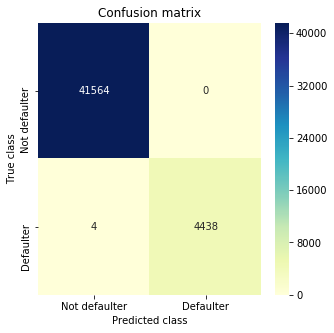

In [10]:
 #Plotting Confusion Matrix
    
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show() 


In [191]:
#clf.fit(X_train, y_train)
features=X_train.columns

In [193]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

count=0
OBJ2_feature_df= pd.DataFrame()

for f in range(X_train.shape[1]):
    if(count<10):
        OBJ2_feature_df = OBJ2_feature_df.append({'Feature' : features[f+1] , 'Feature_no' : indices[f], 'Importance':importances[indices[f]]} , ignore_index=True)
        print( (features[f+1], indices[f], importances[indices[f]]))
        count+=1

print(OBJ2_feature_df)

OBJ2_feature_df.to_csv("OBJ1_feature_df.csv")

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlim([-1, X_train.shape[1]])
# # plt.savefig("OBJ2_featureimportance.png")
# plt.show()


Feature ranking:
('balance', 3, 0.084699167391581925)
('trans_age', 5, 0.08334616498780667)
('loan_amount', 1, 0.060426085955891815)
('duration', 33, 0.053226924104278706)
('payments', 45, 0.049680783367612683)
('no. of inhabitants_x', 32, 0.047039643900336117)
('no_of_municipalities_inhabitants < 499_x', 52, 0.043285279734929197)
('no. of municipalities with inhabitants 500-1999_x', 46, 0.040430536133735741)
('no. of municipalities with inhabitants 2000-9999_x', 35, 0.039403028516731595)
('no. of municipalities with inhabitants >10000_x', 4, 0.022299153227924771)
                                             Feature  Feature_no  Importance
0                                            balance         3.0    0.084699
1                                          trans_age         5.0    0.083346
2                                        loan_amount         1.0    0.060426
3                                           duration        33.0    0.053227
4                                           

In [13]:
# smot_df_X = smot_df.loc[:, smot_df.columns != 'status']
# y = smot_df.loc[:,'status']
# X_train, X_test, y_train, y_test = train_test_split(smot_df_X, y, test_size=0.2)

#random_state = np.random.RandomState(0)
clf= LogisticRegression()
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

C:\Users\Justin.j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 0.906512194062


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  0.906512194062
precision:  0.912280701754
recall:  0.0351193156236
f1:  0.0676349447214
area under curve (auc):  0.517379213196
Confusion matrix [[41549    15]
 [ 4286   156]]


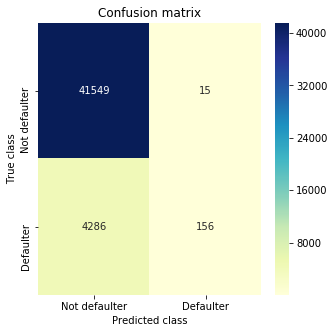

In [15]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show() 


TPOT

In [23]:
import numpy as np
OBJ1_merged_data_dummied= pd.read_csv("OBJ1_merged_data_dummied.csv")
OBJ1_merged_data_dummied.head()

,amount,balance,trans_age,loan_amount,duration,payments,status,no. of inhabitants_x,no_of_municipalities_inhabitants < 499_x,no. of municipalities with inhabitants 500-1999_x,...,mode of transaction_credit in cash,mode of transaction_remittance to another bank,mode of transaction_withdrawal in cash,transaction_character_,transaction_character_household,transaction_character_insurance payment,transaction_character_interest credited,transaction_character_loan payment,transaction_character_payment for statement,transaction_character_sanction interest if negative balance
0,800.0,800.0,2179,79608,24,3317,0,105606,77,26,...,1,0,0,0,0,0,0,0,0,0
1,44749.0,45549.0,2178,79608,24,3317,0,105606,77,26,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,1000.0,2178,52788,12,4399,0,58796,22,16,...,1,0,0,0,0,0,0,0,0,0
3,1100.0,1100.0,2175,21924,36,609,0,157042,49,70,...,1,0,0,0,0,0,0,0,0,0
4,1100.0,1100.0,2175,21924,36,609,0,157042,49,70,...,1,0,0,0,0,0,0,0,0,0


In [24]:
OBJ1_merged_data_dummied.isnull().values.any()

False

In [25]:
OBJ1_merged_data_dummied_tpot= OBJ1_merged_data_dummied.iloc[np.random.permutation(len(OBJ1_merged_data_dummied))]
OBJ1_merged_data_dummied_tpot= OBJ1_merged_data_dummied_tpot.reset_index(drop=True)
OBJ1_merged_data_dummied_tpot.head()

,amount,balance,trans_age,loan_amount,duration,payments,status,no. of inhabitants_x,no_of_municipalities_inhabitants < 499_x,no. of municipalities with inhabitants 500-1999_x,...,mode of transaction_credit in cash,mode of transaction_remittance to another bank,mode of transaction_withdrawal in cash,transaction_character_,transaction_character_household,transaction_character_insurance payment,transaction_character_interest credited,transaction_character_loan payment,transaction_character_payment for statement,transaction_character_sanction interest if negative balance
0,600.0,50978.6,1442,197748,36,5493,0,102609,75,33,...,0,0,1,0,0,0,0,0,0,0
1,9657.0,95563.5,670,230400,60,3840,2,228848,15,40,...,1,0,0,0,0,0,0,0,0,0
2,126.6,34833.7,762,139536,24,5814,0,117897,139,28,...,0,0,0,0,0,0,1,0,0,0
3,2600.0,41202.5,471,184620,60,3077,2,77917,85,19,...,0,0,1,0,0,0,0,0,0,0
4,6359.0,24876.8,174,194160,48,4045,2,161954,21,37,...,0,1,0,0,1,0,0,0,0,0


In [26]:
# tele['class']=tele['class'].map({'g':0,'h':1})
# tele.head()

OBJ1_status = OBJ1_merged_data_dummied_tpot['status'].values

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
training_indices, validation_indices = training_indices, testing_indices = train_test_split(OBJ1_merged_data_dummied_tpot.index,
                                                                                            stratify = OBJ1_status,
                                                                                            train_size=0.75, test_size=0.25)

In [27]:
training_indices.size, validation_indices.size

(172521, 57507)

In [28]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=1,verbosity=2)

tpot.fit(OBJ1_merged_data_dummied_tpot.drop('status',axis=1).loc[training_indices].values,
         OBJ1_merged_data_dummied_tpot.loc[training_indices,'status'].values)

tpot.score(OBJ1_merged_data_dummied_tpot.drop('status',axis=1).loc[validation_indices].values,
           OBJ1_merged_data_dummied_tpot.loc[validation_indices, 'status'].values)

A Jupyter Widget

Generation 1 - Current best internal CV score: 1.0

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35, min_samples_leaf=20, min_samples_split=20, n_estimators=100)


1.0

In [29]:
print("completed")

completed
